In [5]:
# load one back from the dataset
from dataset import get_dataloaders
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

def imshow(inp, title=None):
    """Display image for Tensor."""
    # The dataloader gives us normalized images, so we need to un-normalize them
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def main():
    """
    Loads data and displays a batch of images.
    """
    # Note: These paths are relative to where you run the script from.
    # If you run from the project root `cat_dog_classifier_NN`, they should be correct.
    train_loader, _ = get_dataloaders(
        train_dir='processed/train', 
        val_dir='processed/val', 
        batch_size=8, 
        num_workers=2
    )

    # Get a batch of training data
    images, labels = next(iter(train_loader))

    # Make a grid from batch and show it
    out = torchvision.utils.make_grid(images)
    class_names = train_loader.dataset.classes
    imshow(out, title=",".join([class_names[x] for x in labels]))
    plt.show()



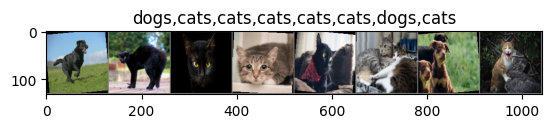

In [6]:
main()

In [3]:
from PIL import Image
from torchvision import transforms
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),      # or whatever size your model expects
    transforms.ToTensor(),              # converts [H, W, C] → [C, H, W], scales to [0, 1]
    transforms.Normalize(mean=[0.5], std=[0.5])  # if grayscale or use 3 channels for RGB
])


In [4]:
# Update the path below to the correct location of your image file
img = Image.open(fp="/home/kaushik/Documents/cat_dog_classifier_NN/exp/Valentine golden retriever.jpeg", mode='r').convert("RGB")  # "L" for grayscale, or "RGB"

img_tensor = transform(img)          # shape: [1, 224, 224] or [3, 224, 224]
img_tensor = img_tensor.unsqueeze(0) # add batch dim → [1, C, H, W]
print(type(img_tensor))


<class 'torch.Tensor'>
